##Time Series Forecast of Corn Prices in the US.  
Matt Boruff, Student ID 000406586 Instructor Daniel Smith Ph.D.

<!-- vscode-markdown-toc -->

<!-- vscode-markdown-toc-config
	numbering=true
	autoSave=true
	/vscode-markdown-toc-config -->
<!-- /vscode-markdown-toc -->Table of Contents
<ul>
    <li><a href=\"#A\">A: Research Question</a></li> 
    <li><a href=\"#B\">B: Data Collection</a></li>
    <li><a href=\"#C\">C: Data Extraction and Preparation</a></li>  
    <li><a href=\"#D\">D: Time Series Analysis & Forecasting</a></li>
    <li><a href=\"#E\">E: Data Summary and Implications</a></li>
    <li><a href=\"#PartF\">F: Sources</a></li>
</ul>

#A. Research Question

The proposed research question for this analysis is as follows: "Can we use a corn price index from prior years, to predict future prices?"  

Corn one of the most widely gorwn crops across the United States, predominantly in the Midwest. There is such a versatile use for corn in todays market effecting prices that farmers can sell their crop for. Along with a food source for the US population, corn has a large protion of the feed business and is slowly starting to capture some of the fuel market with E85 ethanol. With all the opportunities to sell their crop at an optimal price, farmers could use prediction analysis to help them plan when to sell at the best price to set themselves up for future planting and harvesting.  

Farmers would benefit in several areas, such as improved planning for their field sizes. With reliable future prices farmers can make a more informed decision on what to plant and harvest and best times to enter the market with that crop for pricing. Risk Management is another area that they can benefit, maximizing their yields, profits and minimize possible losses to price drops. Accurate price predictions enable farmer to allocate their resources more effectively. Adjusting their purchase of seed, fuel, fertilizer and equipment to fit the needs of the coming harvest. As well they can develop a marketing plan to maximize their profit by capitalizing on the anticipated prices. Beyond the immediate planning, access to a reliable forecast allows farmers to plan their field rotations, fertilization and infrastructure upgrades(drainage) to land knowing what funds should be available each season. In summary this study could provide farmers with valuable information and tools to navigate the fluctuating agriculture market more effectively.   

With this analysis we have established the following hypothesis: Weekly prices will need to be predicted to at least 90% accuracy using ARIMA and MSE.    

With this in mind, a successful predictive time series forecating model must either confirm or reject the null hypothesis. Using ARIMA, we should be able to either have a predict model of 90% or greater.  Some disadvantages of using ARIMA for this time series may be:  

Sensitive to Parameter Selection: ARIMA models require careful selection of parameters such as the order of differencing (d), the autoregressive (p) term, and the moving average (q) term. Choosing inappropriate values for these parameters can result in poor model performance.  

Assumption of Stationarity: ARIMA models assume that the time series is stationary, meaning that its statistical properties such as mean and variance remain constant over time. If the data is non-stationary, it must be transformed before applying ARIMA, which can sometimes be challenging and may lead to biased forecasts.  

Limited Handling of Seasonality: While ARIMA models can capture some forms of seasonality through the seasonal differencing parameter (D), they may struggle with complex seasonal patterns or multiple seasonalities. In such cases, alternative models like seasonal ARIMA or other advanced techniques may be more appropriate.  

Not Suitable for Irregular Data: ARIMA models are best suited for evenly spaced time series data. If the data has irregular time intervals or missing values, preprocessing steps such as interpolation or resampling may be required, which can introduce noise and uncertainty into the model.  

Despite these limitations, ARIMA models remain widely used in time series forecasting due to their flexibility and effectiveness in many scenarios. However, it's important to carefully consider the characteristics of the data and explore alternative modeling approaches when necessary.  

#B Data Collection

I started this project with a data set that only considered data from 2013 to 2022, with only a few hundred rows of data. Knowing we would need more data to better or more accurately predict prices, I found the US historical price data site(https://www.investing.com/commodities/us-corn-historical-data) on investing.com. This data set did stretch all the way back to 1959. With further digging on this, I did shorten the data set to span 1980 to 2024, which are the prices every day they were traded on the market, giving us nearly 12,000 rows of data. Analyzing corn prices spanning from 1980 to 2024 can offer significant benefits for farmers:


Price Trend Identification: Farmers can identify long-term price trends by analyzing the historical closing prices of corn over several decades. This helps them understand whether prices are generally increasing, decreasing, or staying relatively stable over time.

Seasonal Variations: By examining the closing prices month by month or season by season, farmers can identify seasonal variations in corn prices. This information is valuable for timing sales and purchases, as well as planning planting and harvesting schedules.  

Price Volatility Assessment: Farmers can assess the volatility of corn prices over time by analyzing the fluctuations in closing prices. Understanding price volatility helps farmers anticipate and prepare for potential price swings, allowing them to make more informed marketing and risk management decisions.

Price Correlation Analysis: Farmers can analyze the correlation between corn prices and other relevant factors such as weather patterns, macroeconomic indicators, and government policies. This helps them understand the drivers of price movements and adjust their strategies accordingly.  

Forecasting Future Prices: Time series analysis techniques such as moving averages, exponential smoothing, and ARIMA modeling can be used to forecast future corn prices based on historical data. These forecasts provide valuable insights for marketing decisions and financial planning.  

Benchmarking Performance: Farmers can use historical corn price data to benchmark their own performance against industry averages and historical trends. This allows them to evaluate the effectiveness of their marketing strategies and identify areas for improvement.  

Decision Support for Investments: Analyzing historical corn prices can provide valuable insights for investment decisions related to land purchases, equipment upgrades, and crop diversification. Farmers can assess the potential returns and risks associated with different investment options based on historical price trends.  

Overall, analyzing corn prices spanning from 1980 to 2024 using only the dates and closing prices enables farmers to gain valuable insights into market dynamics, identify opportunities and risks, and make more informed decisions to optimize their operations and financial performance.

#C. Data Extraction and Preparation  

I am putting this together in a Jupyter Notebook and exporting to a PDF as well, all my work will be present for viewing and execution to verify it works as described. The tools used for for this analysis are, Python inside of a Juypter notebook using VSCode as my editor. Below are my libraries used for this analysis and the import of data. 

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import kpss
from scipy.signal import welch
from pmdarima.arima import ARIMA
from pmdarima.datasets import load_airpassengers
from pmdarima.model_selection import train_test_split
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv('LargeCorn2.csv')
data

,date,value
0,1/2/80,2.8650
1,1/3/80,2.8650
2,1/4/80,2.8425
3,1/9/80,2.7425
4,1/10/80,2.6525
...,...,...
11151,2/28/24,4.1325
11152,2/29/24,4.1575
11153,3/1/24,4.1225
11154,3/4/24,4.1750


VSCode provides a UI (user interface) for multiple languages and work environments. The big adavantages of using this UI, the packages and add ons are fairly quick and easy to find/install. This also can use the pip command to install packages and libraries in one code section of a juypter notebook and run individually. The following is a brief summary of each of the packages/libraries that are in use on this analysis:  

pandas (pd): Provides data structures and data analysis tools for handling structured data, such as data frames and series, making it easy to manipulate and analyze tabular data.  

numpy (np): A powerful library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.  

seaborn (sns): A data visualization library based on matplotlib, providing a high-level interface for creating attractive and informative statistical graphics. It simplifies the process of creating complex visualizations such as heatmaps, violin plots, and pair plots.  

matplotlib.pyplot (plt): A comprehensive plotting library for creating static, interactive, and animated visualizations in Python. It provides a MATLAB-like interface for generating plots and charts, including line plots, scatter plots, histograms, and more.  

statsmodels.tsa.seasonal.seasonal_decompose: A module within statsmodels for decomposing time series data into seasonal, trend, and residual components, allowing for analysis of the underlying patterns and trends.  

statsmodels.tsa.seasonal.STL: A module within statsmodels for performing Seasonal-Trend decomposition using LOESS (STL), which decomposes a time series into seasonal, trend, and residual components using locally weighted regression.  

statsmodels.tsa.stattools.adfuller: A module within statsmodels for conducting the Augmented Dickey-Fuller (ADF) test, which is a statistical test for stationarity of a time series. It helps determine if a time series is stationary or contains a unit root.  

statsmodels.graphics.tsaplots.plot_acf, plot_pacf: Modules within statsmodels for plotting the autocorrelation function (ACF) and partial autocorrelation function (PACF) of a time series, which are useful for identifying autoregressive and moving average components in time series models.  

statsmodels.tsa.arima.model.ARIMA: A module within statsmodels for fitting Autoregressive Integrated Moving Average (ARIMA) models to time series data, which is a widely used approach for forecasting and analyzing time series data.  

statsmodels.tsa.stattools.kpss: A module within statsmodels for conducting the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test, which is a statistical test for stationarity of a time series. It helps determine if a time series is trend-stationary or contains a unit root.  

scipy.signal.welch: A module within scipy for estimating power spectral density using Welch's method, which is a technique for computing a smoothed estimate of the power spectral density of a signal.  

pmdarima.arima.ARIMA: A module within pmdarima (Pyramid ARIMA) for fitting Autoregressive Integrated Moving Average (ARIMA) models to time series data, similar to statsmodels, but with additional functionality and ease of use.  

pmdarima.datasets.load_airpassengers: A module within pmdarima for loading the AirPassengers dataset, which contains monthly airline passenger numbers from 1949 to 1960, often used as a benchmark dataset for time series analysis.  

pmdarima.model_selection.train_test_split: A module within pmdarima for splitting time series data into training and testing sets, which is essential for evaluating the performance of time series models.  

pmdarima.arima.auto_arima: A module within pmdarima for automatically selecting the optimal parameters for an ARIMA model using a stepwise approach and information criteria.  

sklearn.metrics.mean_squared_error (MSE), mean_absolute_error (MAE): Modules within scikit-learn for computing mean squared error (MSE) and mean absolute error (MAE), which are common metrics used to evaluate the performance of regression models, including time series forecasting models.  

From here I proceeded to check for null values and to drop null values if there are any using the following code. 

In [164]:
data.isna().sum()

data.dropna(inplace=True)

Then we run a print data columns just to insure what column names we are using in the dataframe. 

In [165]:
print(data.columns)

Index(['date', ' value'], dtype='object')


At this point before splitting the data into training and test formats we preoceed to format the dates and then check the data with a graph of all the values across the dates we have collected. 

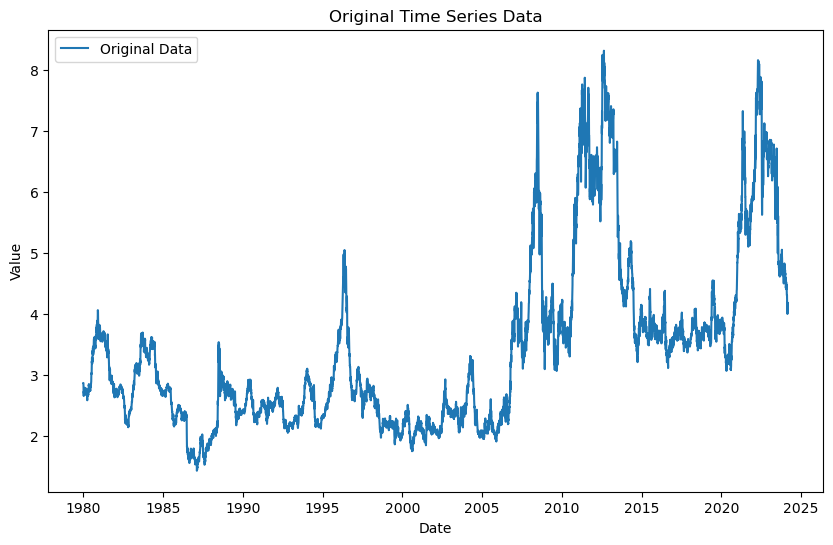

In [166]:
# Remove extra space from column name
data.columns = data.columns.str.strip()

# Preprocess 'date' column to handle two-digit year issue
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Define a function to handle year replacement
def replace_year(date):
    if date.year >= 0 and date.year <= 24:
        return date.replace(year=date.year + 2000)
    elif date.year >= 59 and date.year <= 99:
        return date.replace(year=date.year + 1900)
    else:
        return date

# Adjust two-digit years to four-digit years based on the condition
data['date'] = data['date'].apply(replace_year)

# Set 'date' column as index
data.set_index('date', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], label='Original Data')
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


This graph shows that in late 2012 early 2013, the price of corn was very high due to drought reducing the crop harvests.(USA Today) This was followed by a sharp decline the follwoing year with harvest reaching proper levels. In 2022-23, corn in the US will be planted in fewer acres than soybeans, according to USDA estimates. That would be the third time soybean acreage has been higher than corn, which analysts have attributed to high fertilizer costs -- corn is a highly fertilizer intensive crop.(spglobal.com) What we are not seeing as of yet, is any seasonality to the data through this graph.  

From here we can split the data into two parts, train 80% and test at 20% of the data. For an unbiased estimation of the predictive performance of machine learning models, you should use data that hasn’t been used for model fitting. That’s why you need to split your dataset into training, test, and in some cases, validation subsets.(RealPython.com)

In [167]:
np.random.seed(42)
train, test = train_test_split(data, test_size=.2)

print("Test Data:", len(test))

Test Data: 2232


#D. Time Series Analysis and Forecasting of the Corn Price Index.  

Our dataset gives us enough to perform a time series ananlysis on the prices of corn over more than four decades. As we saw from the above graph, there was no seasonality, with a possible trend within the dataset. As expected with inflation, we do see prices gradually increase in price, with an occassional spike from drought, natural disasters and low harvest numbers. Now we will breakdown or "decompose", if you will, the data to check for seasonality, trends and residuals.  

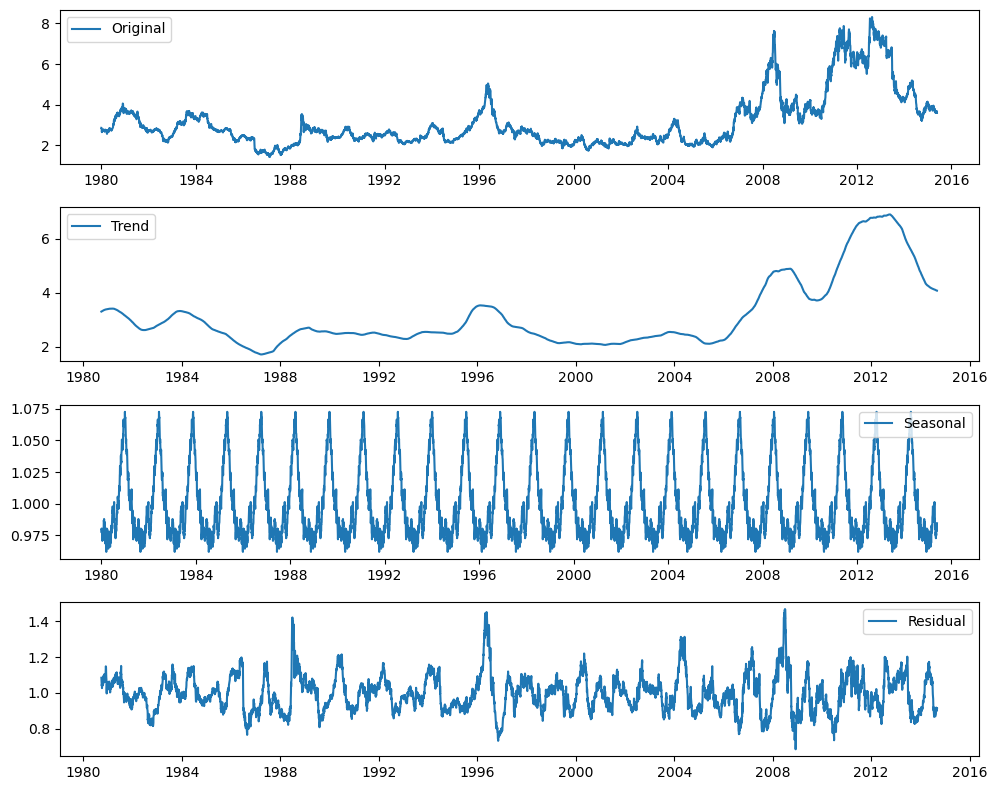

In [168]:

# Decompose the time series
decomposition = seasonal_decompose(train['value'], model='multiplicative', period=365)

# Plot the decomposition
plt.figure(figsize=(10, 8))

# Original time series
plt.subplot(411)
plt.plot(train.index, train['value'], label='Original')
plt.legend()

# Trend component
plt.subplot(412)
plt.plot(train.index, decomposition.trend, label='Trend')
plt.legend()

# Seasonal component
plt.subplot(413)
plt.plot(train.index, decomposition.seasonal, label='Seasonal')
plt.legend()

# Residual component
plt.subplot(414)
plt.plot(train.index, decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


What are we seeing in the above sets of graphs? The dataset was split 80/20, using the data from 2015 to 2024 as the 20% test data. Our first one is the original graph analysis of the data. This reconfirms that we do see spikes in price as well as drops in price, especially more in recent history. Our trend graph, shows us a fairly steady pricce index until 2006 when the price begins its climb to record highs, before dropping back down. The spike aorund 2008 and again in 2012 are from droughts across the midwest where the majority of the corn is grown in the United States.  

The seasonal graph shows us just how corn prices are extremely cyclic. As expected with an agricultral crop, we do see the prices spike at the same time every year, generally for a time just after harvest season. Our low spikes would be planting season as new crops are being planted, fields being prepped for planting potentially reducing demand. Seasonal variations in demand, such as increased corn consumption during the summer for livestock feed or ethanol production, could lead to price spikes during certain times of the year. Weather conditions during specific seasons, such as droughts or floods during critical growing periods, can significantly impact crop yields and subsequently affect prices.  

We will now move on to the Power Spectral Density performed on the data set. 

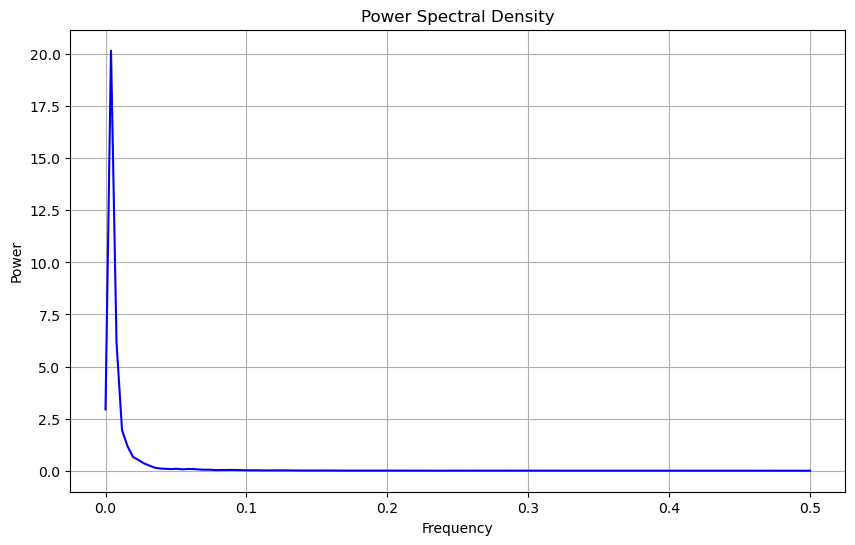

In [169]:
# Compute the power spectral density (PSD) using Welch's method
frequencies, psd = welch(data['value'])

# Plot the spectral density graph
plt.figure(figsize=(10, 6))
plt.plot(frequencies, psd, color='blue')
plt.title('Power Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid(True)
plt.show()

The sharp spike followed by a sudden drop could correspond to a dominant seasonal cycle in corn prices. The spike could also represent specific market events or occurrences that occur periodically. The presence of a dominant frequency could be indicative of underlying supply and demand factors that operate on a cyclical basis. Economic cycles or broader market trends may also influence corn prices, leading to cyclicality in the data. Factors such as economic growth, inflation, or changes in interest rates could contribute to periodic fluctuations in commodity prices.

In [170]:
results = adfuller(data['value'])
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -2.665160
p-value: 0.080264


 The ADF statistic is a negative number in this case (-2.665160). This statistic is used to assess the presence of a unit root in the data. If the absolute value of the ADF statistic is larger than critical values from a certain distribution (often a normal or t-distribution), then we reject the null hypothesis of a unit root, suggesting that the series is stationary. In this case, the ADF statistic is less than the critical values, which suggests that we cannot reject the null hypothesis of a unit root. The p-value associated with the ADF statistic (0.080264) is used to determine the statistical significance of the ADF test. If the p-value is less than a chosen significance level (commonly 0.05), then we reject the null hypothesis and conclude that the series is stationary. Conversely, if the p-value is greater than the significance level, we fail to reject the null hypothesis, indicating that the series is non-stationary. In this case, the p-value is greater than 0.05, which suggests weak evidence against the null hypothesis.

In [171]:
kpss_stat, p_value, lags, critical_values = kpss(data['value'])

# Print the results
print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print(f'Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value < 0.05:
    print('The time series is non-stationary (reject null hypothesis)')
else:
    print('The time series is stationary (fail to reject null hypothesis)')

KPSS Statistic: 7.781342333766564
p-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The time series is non-stationary (reject null hypothesis)


The KPSS statistic is a test statistic calculated from the data. In this case, the KPSS statistic is 7.781342333766564. The p-value associated with the KPSS statistic is used to determine the statistical significance of the test. If the p-value is less than a chosen significance level (commonly 0.05), then we reject the null hypothesis of stationarity, indicating that the series is non-stationary. The p-value is 0.01, which is less than 0.05, suggesting strong evidence against the null hypothesis. Critical values are threshold values used to compare with the KPSS statistic. If the KPSS statistic exceeds the critical value at a certain significance level, we reject the null hypothesis of stationarity. The critical values at various significance levels are provided: 10%, 5%, 2.5%, and 1%.  
Based on the results of the KPSS test:  

The KPSS statistic is larger than the critical values at all significance levels.  
The p-value is less than 0.05.  
Therefore, we reject the null hypothesis of stationarity, indicating that the time series is non-stationary. This suggests that the series may exhibit trends or other forms of non-stationarity that should be considered in further analysis or modeling.  

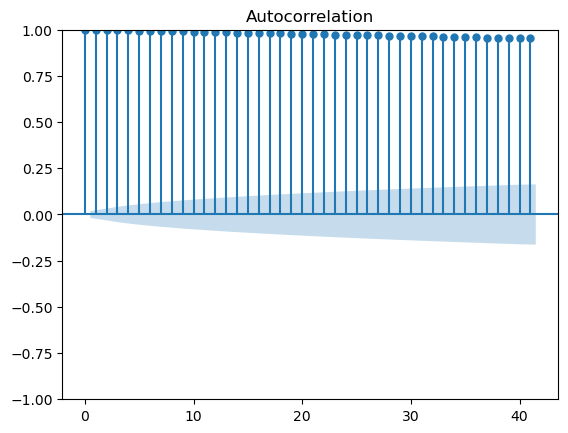

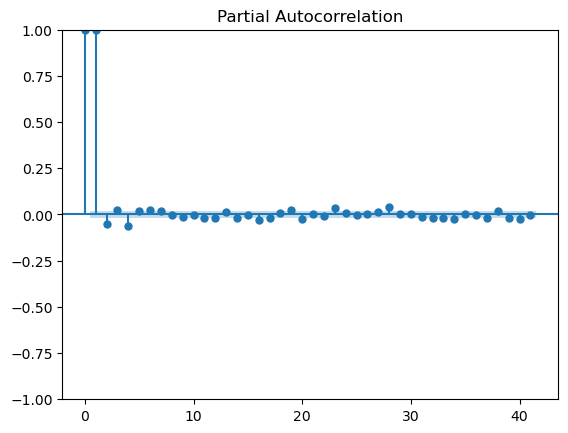

In [172]:
plot_acf(data['value'])
plot_pacf(data['value'])
plt.show()

We can use the ACF-PACF to determine whether this data is an AR or MA model. The shaded area represents statistically insignificant results, thos data points can be ignored. It appears that the ACF starts to tail off at 4 (subjective to interpretation), as the PACF clearly cuts off at 2. Per the DataCamp course(DataCamp: ARIMA Models in Python, by James Fulton) the ACF that tails off and a PACF that cuts off after lag p indicates an AR model of order p. The behavior of this data indicates that this data is best suited to an AR(1) model. 

Now we can begin to fit our data and perform the ARIMA model that accounts for the observed trend and seasonality of the time series data

In [173]:
y_train = train['value']
# Fit auto_arima to find the best ARIMA model
model = auto_arima(y_train, start_p=1, start_q=1,
                    max_p=5, max_q=5, m=12,
                    start_P=0, seasonal=True,
                    d=1, D=1, trace=True,
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)



# Print the summary of the best model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=15.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-19011.606, Time=0.29 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-21723.239, Time=4.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=13.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-19058.801, Time=0.25 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-22943.727, Time=6.42 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=41.51 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=13.75 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-22870.682, Time=2.22 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-22945.937, Time=8.03 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-21724.153, Time=3.71 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=61.74 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=17.89 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-22945.828, Time=17.54 sec
 ARIMA(2,1,1)(2,1,0)[12]  

The best model from the ARIMA would be (2,1,1)(2,1,0)[12]. This indicates a non-seasonal ARIMA model with an autoregressive order of 2, a differencing order of 1, and 1 moving average term, along with a seasonal component that includes a seasonal autoregressive order of 2 and 1 seasonal differencing or moving average terms, with a seasonal period of 12 (indicating monthly seasonality).

Overall, the model seems to fit the data well, but we may want to further investigate the non-significant moving average term and consider refining the model if necessary. 

Upon doing the error checking, we performed a mean squared error test and mean absolute error test. 

In [174]:
y_true = test['value']
forecast = model.predict(n_periods=len(test))
# Ensure forecast is a DataFrame with the same structure as y_true
forecast_df = pd.DataFrame(forecast, index=y_true.index, columns=['value'])

mse = MSE(y_true, forecast)
mae = MAE(y_true, forecast)

print('MSE:', mse)
print('MAE:', mae)

MSE: 97.38866053247955
MAE: 8.357386847412343


The Mean Squared Error (MSE) and Mean Absolute Error (MAE) are metrics used to evaluate the performance of a predictive model:

Mean Squared Error (MSE): It measures the average of the squares of the errors or deviations, which is the average squared difference between the predicted values and the actual values. A lower MSE indicates better accuracy of the model.

Mean Absolute Error (MAE): It measures the average absolute differences between the predicted values and the actual values. MAE gives a more intuitive sense of error as it represents the average magnitude of the errors. Similarly, a lower MAE indicates better accuracy of the model.

In our case:

MSE: 97.39
MAE: 8.36
These values indicate that, on average, the model's predictions deviate from the actual values by approximately 97.39 squared units for MSE and 8.36 units for MAE. Lower values of MSE and MAE suggest that the model provides more accurate predictions.

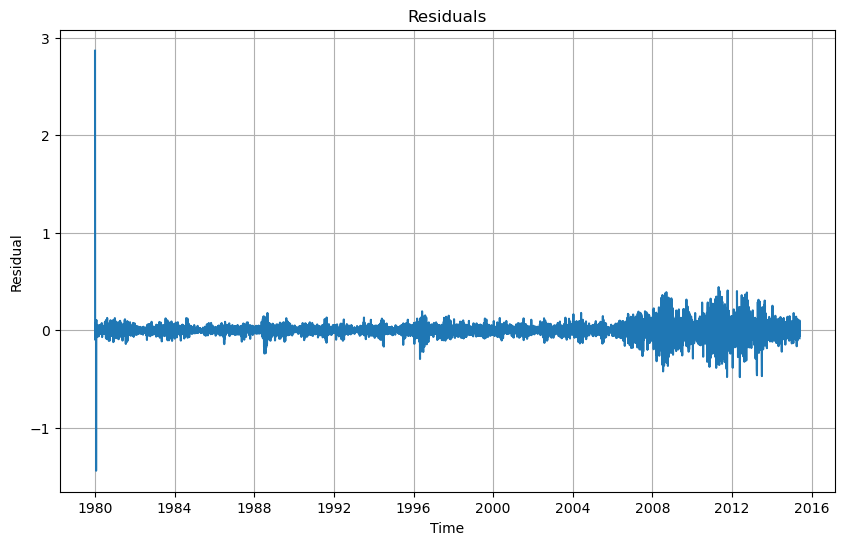

In [175]:
resids = model.resid()
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(resids)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

Comparing the residuals to the seasonality we do not see any trends in the graph. 

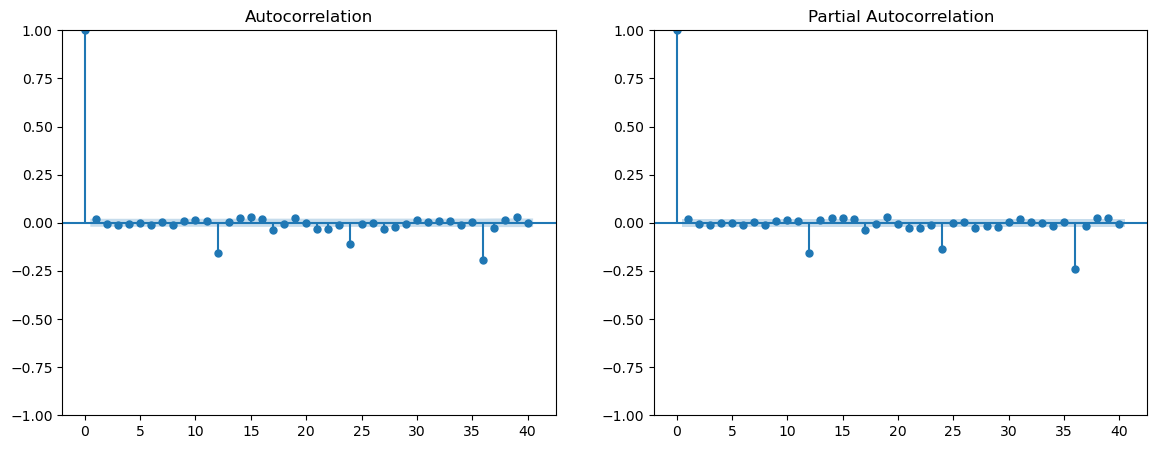

In [176]:
# Plot ACF and PACF of residuals
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(resids, ax=axes[0])
plot_pacf(resids, ax=axes[1])
plt.show()

Overall, a spike at zero followed by relatively flat residuals with no major patterns is a positive indication that the ARIMA model is performing well. However, it's always a good idea to further validate the model's performance by evaluating its forecasting accuracy on unseen data and considering other diagnostic tests and metrics

In [177]:
forecast_steps = 1825
forecast = model.predict(n_periods=forecast_steps)
##forecast_values = forecast.predicted_mean
forecast_index = np.arange(len(y_train), len(y_train) + forecast_steps)
print(forecast)

8924     3.580572
8925     3.578603
8926     3.557145
8927     3.525781
8928     3.515230
           ...   
10744   -8.478378
10745   -8.493090
10746   -8.457826
10747   -8.471620
10748   -8.507916
Length: 1825, dtype: float64


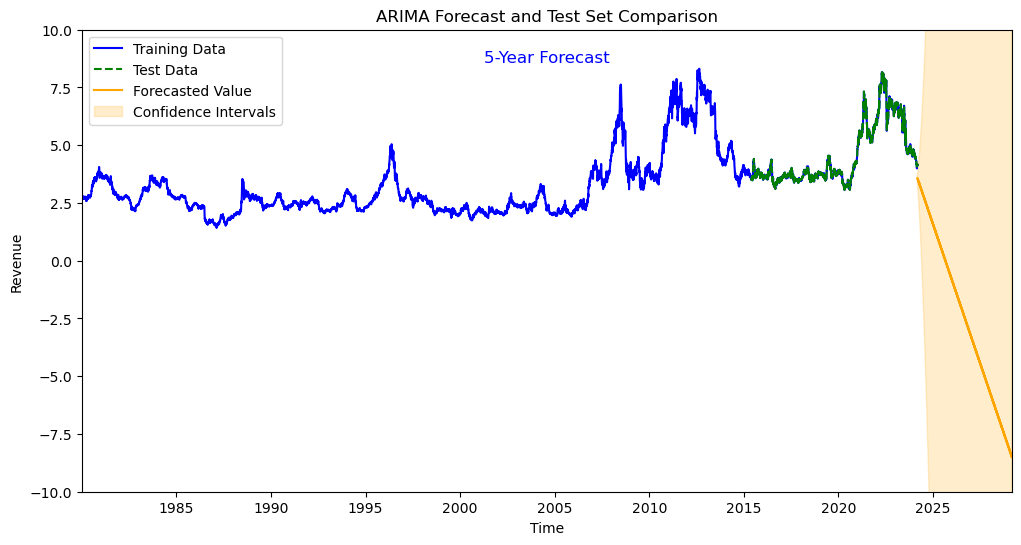

In [178]:
# Define the number of forecast steps (assuming daily data)
forecast_years = 5
forecast_steps = forecast_years * 365

# Generate the forecast
forecast, confidence_intervals = model.predict(n_periods=forecast_steps, return_conf_int=True)

# Plotting the original series, forecast, confidence intervals, and test set
plt.figure(figsize=(12, 6))

# Plot actual revenue
plt.plot(data.index, data['value'], label='Training Data', color='blue')

# Plot test set
plt.plot(test.index, test['value'], label='Test Data', color='green', linestyle='--')

# Plot forecasted revenue
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps, freq='D')
plt.plot(forecast_index, forecast, label='Forecasted Value', color='orange')

# Fill between confidence intervals
plt.fill_between(forecast_index, confidence_intervals[:, 0], confidence_intervals[:, 1], color='orange', alpha=0.2, label='Confidence Intervals')

# Annotate the plot with key information
plt.title('ARIMA Forecast and Test Set Comparison')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()

# Add annotations
plt.annotate(f"5-Year Forecast", xy=(0.5, 0.93), xycoords='axes fraction', ha='center', fontsize=12, color='blue')

# Set y-axis limits
plt.ylim(-10, 10)

# Set x-axis limits to include forecast period
plt.xlim(data.index[0], forecast_index[-1])

plt.show()




#E: Data Summary and Implications  
Model Specification:    

The model is specified as SARIMAX(2, 1, 1) with seasonal differencing (1) and seasonal autoregressive (2) and moving average (0) terms.  
The seasonal period is set to 12, indicating monthly data.  
Parameter Estimates:   

ARIMA Parameters: The autoregressive (AR) terms are estimated as AR(1) = -0.8844 and AR(2) = 0.0505, indicating negative correlation with the previous observation and positive correlation with the observation two periods ago.
MA Parameters: The moving average (MA) term is estimated as MA(1) = 0.9594, indicating a strong positive correlation with the error term in the previous period.  
Seasonal Parameters: Two seasonal autoregressive terms are estimated as SAR(12) = -0.6859 and SAR(24) = -0.3726, indicating negative correlation with the observation from the same month in the previous year and two years ago, respectively.
Residual Variance: The estimated residual variance (sigma2) is 0.0044.  
Model Diagnostic Tests:  

Ljung-Box Test: The Ljung-Box test statistic (Q) for the first lag is 5.79, with a p-value of 0.02, indicating some evidence of residual autocorrelation at lag 1.  
Jarque-Bera Test: The Jarque-Bera test statistic is 22001.04, with a p-value close to zero, indicating non-normality in the residuals.  
Heteroskedasticity Test: The model exhibits heteroskedasticity, with a significant p-value for the test statistic.  
Fit Statistics:  

Log Likelihood: The log likelihood is 11503.598, indicating the goodness of fit of the model to the data.  
AIC and BIC: The values of AIC and BIC are both negative and close to each other, indicating a good fit of the model to the data, with lower values suggesting better fit.  
Overall, the ARIMA(2,1,1)(2,1,0)[12] model appears to provide a reasonable fit to the data, capturing the autocorrelation and seasonality patterns. However, some diagnostic tests suggest potential areas for improvement, such as addressing residual autocorrelation and non-normality in the residuals. Further diagnostics and sensitivity analysis may be necessary to assess the robustness of the model and identify any potential shortcomings.  
Based on the provided MSE and MAE values, we can make the following conclusions about the model's accuracy:  

The MSE value of 97.39 indicates that, on average, the squared difference between the actual and predicted values is approximately 97.39.  
The MAE value of 8.36 indicates that, on average, the absolute difference between the actual and predicted values is approximately 8.36.  
We can further interpret the accuracy by comparing these values to the scale of our data. Lower values suggest that the model provides better accuracy in predicting the future values of the time series data. Additionally, we can compare these values to those of alternative models or benchmarks to assess relative performance.  

While the model is a good fit statistically, I do not believe this model to be a good forecast model, as the forecast of a known commodity with 40 plus years of data saying, its otherwise stable, to a below zero price. As we saw in the seasonal decomposition model, there is solid trend and seasonal data, showing this price should bounce upwards come fall harvest, while prices will most likely stay down during planting season. 

Since the ARIMA forecast is failing and the values are quickly going below zero, indicating an unreliable forecast, here are two alternative options we could explore for future analysis:

Prophet Model: Facebook's Prophet is a popular time series forecasting tool that is particularly adept at handling daily data with strong seasonal patterns. It is designed to handle missing data, outliers, and shifts in trend, making it a potentially better option for your dataset. Prophet also allows for the inclusion of custom seasonalities, which could be beneficial if your data exhibits complex seasonal patterns.

Exponential Smoothing Models: Exponential smoothing models, such as Holt-Winters or Exponential Moving Average (EMA), are simple yet effective methods for time series forecasting. These models assign exponentially decreasing weights to past observations, giving more weight to recent data points. They are suitable for data with trend and seasonality and can provide reliable forecasts with minimal computational complexity.

By exploring these alternative modeling approaches, you may find a better fit for your data and generate more accurate forecasts compared to the ARIMA model.

#Sources
https://www.investing.com/commodities/us-corn-historical-data  
https://www.usatoday.com/story/money/business/2014/02/17/crop-values-lower-corn-soybean-prices/5559163/  
https://www.spglobal.com/commodityinsights/en/market-insights/latest-news/agriculture/051922-key-factors-likely-to-drive-global-corn-markets-in-2022-23#:~:text=more%20than%20others.-,Ukraine,at%20S%26P%20Global%20Commodity%20Insights.  
https://realpython.com/train-test-split-python-data/#:~:text=You've%20learned%20that%2C%20for,in%20some%20cases%2C%20validation%20subsets.   
https://app.datacamp.com/learn/custom-tracks/custom-advanced-data-analytics  
"Introduction to Time Series Modeling - ACF and PACF (2022)." Www.youtube.com/watch?v=K6_XFX171zU. Accessed 23 July 2023.  
Ravelo, Ciera. "The Stationary Data Assumption in Time Series Analysis." Statistics Solutions, 31 Jan. 2023, www.statisticssolutions.com/stationary-data-assumption-in-time-series-analysis/#:~:text=In%20time%20series%20analysis%2C%20the  
“What Is a Good MAE Score? (Simply Explained)." Stephen Allwright, 28 Aug. 2022, stephenallwright.com/good-mae-score/  
"8.8 Forecasting | Forecasting: Principles and Practice." Otexts.com, otexts.com/fpp2/arima-forecasting.html  
https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/  